# Machine learning - Assignment 7 - Support vector classifiers
____
**Author**: Kemal Cikota

**Course**: Machine learning
____

## Introduction

In this assignment, i will work with Support vector classifiers (SVMs). I will show how to learn and assess SVM classifiers and how to apply SVM on data and also give interpretations of how SVM can affect performance in models. This assignment is split in to two major parts, a conceptual and theoreticall part where i answer theory questions about SVM and the latter part of the assignment is a practical part where i actually implement and apply SVM.

## Conceptual Questions

**1. What is the intuition behind SVMs and how do they work?**

Support Vector Machines (SVM's) are machine learning algorithms that are applicable for both classification and regression. The main point with SVM is to find the optimal decision boundary that separates different classes in the dataset with the maximum margin. We can recall from past assignment that a decision boundary can be defined as a line or place that separates different classes in a classification problem and it is the exact region where the model makes a "decision". The margin is the space between the decision boundary and the closest data points from each class. In SVM we try to make this margin as big as possible in order to make the model more confident and generalizable.

In SVM, we essentially draw a line (or plane) that separates two classes while ensuring the widest gap between them (maximum margin).

This is a summary of how the algorithm works:

1. SVM will identify a hyperplane that separates classes with the largest possible margin. All of the points that lie on this boundary or closest are called support vectors because they span out the margin.
2. The algorithm will try to maximize this margin by trying to a hyperplane that has the biggest area between itself and its support vectors.
3. In most realistic cases, the data is not linearly separable, which means that we can not fit a line or hyperplane on a set of data. SVM does have ways of handling this by mapping data on a higher dimensional space where we may find a linear separator that can be defined as a straight line. There is also something called the "kernel trick" where we try to apply transformations like polynomial terms or penalty functions without computing the higher dimension coordinates.
4. Real world data can also often include noise and overlapping classes. SVM can also handle this by using "soft C margins" in order to balance the margin maximization and classification accuracy.

**2. Are SVMs always robust regarding overfitting and noisy data? Discuss your answer considering apects such as the choice of kernel and the degree of noise in the data.**

If we have a hard margin, which means that we need separate separation between classes, then noisy datapoints such as outliers or mislabeled points can have an undesired impact on the decision boundary which can lead to poor overfitting. In order to handle this, we have a "secondary margin", or "soft margin" where we add slack variables to the constraints that bound the decision area which makes the model more tolerant to noise as our decision bounds now becomes more "flexible". in most problems, we need to find a good balance in our slack that balances having a big margin while also minimizing misclassification and this is controlled by a "C variable". A lower C will give us a larger but more risk of misclassification and a bigger C will lead to less misclassification but more risk of overfitting.

Some datasets can not be separated by a straight line. And SVM can handle this by using "kernel functions" where SVMs default dot product between data points get replaced by a kernel function that computes the dot product in a separate transformed set instead of mapping a point from one space to another space with varrying dimensions. There are different kinds of kernels, like for example, linear, polynomial, Radial Basis Function (RBF) kernel and sigmoid kernels. Choosing the type of kernel for a dataset is important as it has a direct effect on overfitting and robustness. A linear kernel works well when the data is linearly separable, meaning we can just separate data with straight lines and works well when we have a lot of data and is less likely to overfit.

A polynomial kernel works well when we cant separate the data with straight lines so our decision bounds is instead makes us able to divide the data with a curve instead. However, if we have higher degree polynomials, it can overfit the model on noisy data so its important to decide a good degree.

A RBF kernel can handle non-linearity without requiring higher polynomials by calculating similarity between points using a similarity parameter that controls how much influence a singe point has. But it is important to choose a good parameter for this as well because a too high parameter will our decision boundary too flexible as too many outlying points will have an effect on normally valid points. While a too low of a parameter can lead to underfitting.

## Practical

For the practical part of the assignment, i will begin by generating data, then learn support vector classifiers from that data and then in the end use the Khan dataset in order to apply SVM.

### Generate data and get an overview of the data

We will begin by generating the observations belonging to the two classes.

One important thing to note straight of the bat is that i use a fixed seed for this assignment just to make my interpretations make sence if someone else wanted to run this notebook and the results were different. In order to get a "more random" result, remove the "1" from the "np.random.seed(1)" piece of code.

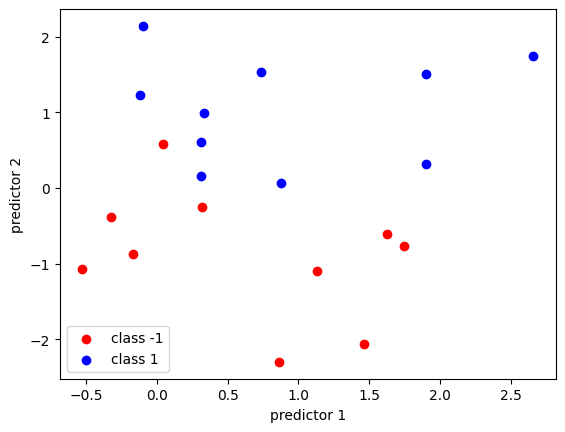

In [1]:
# Generate 20 normally distributed random numbers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

# Generate list of 20 normally distributed random numbers
np.random.seed(1) # fixed seed for reproducibility

X = np.random.randn(20, 2)
y = np.array([-1]*10 + [1]*10)  # first 100 are -1, next 100 are +1
X[y == 1] += 1

y = np.array([-1]*10 + [1]*10)

plt.scatter(X[:10, 0], X[:10, 1], color='red', label='class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='blue', label='class 1')

plt.xlabel('predictor 1')
plt.ylabel('predictor 2')
plt.legend()
plt.show()

By checking the graph visually, we can see that the classes are not linearly separable.

### Learn and assess a support vector (soft margine) classifier

We can fit the model to our data like many other models thanks to SKLearn. we also set the Cost to 10 and we use a linear kernel for this.

In [2]:
C = 10 # same as cost in R
svm_model = make_pipeline(SVC(kernel='linear', C=C))
svm_model.fit(X, y)

Pipeline(steps=[('svc', SVC(C=10, kernel='linear'))])

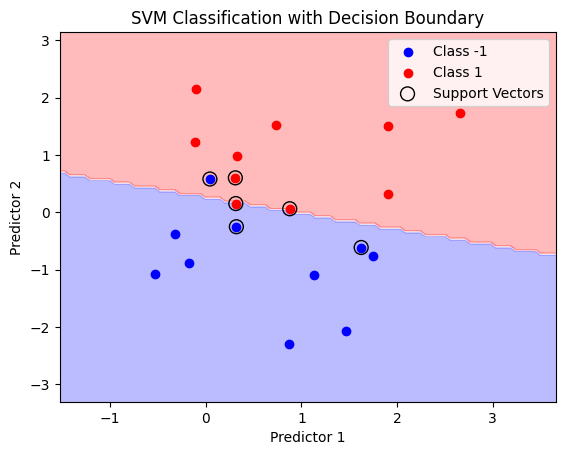

support vector indicies:  [ 0  4  9 13 15 16]
Number of errors: 2


In [3]:
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:10, 0], X[:10, 1], color='blue', label='Class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='red', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)

y_pred = svm_model.predict(X)
errors = (y_pred != y).sum()
print("Number of errors:", errors)


We now choose a lower "cost parameter", which is the C variable in my code. I will lower it to 0.1.

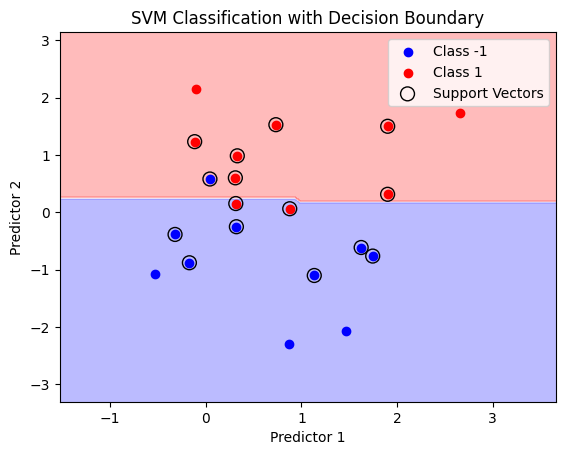

support vector indicies:  [ 0  3  4  6  7  8  9 11 12 13 14 15 16 17 18]
Number of errors: 3


In [4]:
C = 0.1 # same as cost in R
svm_model = make_pipeline(SVC(kernel='linear', C=C))
svm_model.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:10, 0], X[:10, 1], color='blue', label='Class -1')
plt.scatter(X[10:, 0], X[10:, 1], color='red', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)

y_pred = svm_model.predict(X)
errors = (y_pred != y).sum()
print("Number of errors:", errors)

INTERPRETATION OF RESULTS

I now want to perform grid search cross validation on this model in order to find the most optimal C-parameter over different test-parameters.

Here i make an assumption that i should stick with the linear kernel for now as i think that the R-code from the example also only does CV for a linear kernel.

In [5]:
svm_pipeline = make_pipeline(SVC(kernel='linear'))

param_grid = {'svc__C': [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}


grid_search = GridSearchCV(
    svm_pipeline,
    param_grid=param_grid,
    scoring=('accuracy'),
    return_train_score=True,
    cv=10  # 10 folds
)

grid_search.fit(X, y)

# results of gridsearch
print(grid_search.cv_results_)

# Print the best C value and the best accuracy score
print("\n\nBest C:", grid_search.best_params_['svc__C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Retrieve the best model
best_model = grid_search.best_estimator_
print("Support vectors of the best model:", best_model)

# print classes of the best model
print("Classes of the best model:", best_model.named_steps['svc'].classes_)
print("Number of support vectors for each class:", best_model.named_steps['svc'].n_support_)

{'mean_fit_time': array([0.00104802, 0.00111046, 0.00097704, 0.0011364 , 0.00110016,
       0.00100849, 0.00108364, 0.00097833, 0.00106432, 0.00101259,
       0.00098302, 0.00100539, 0.00098836, 0.00099144, 0.00094357,
       0.00104506, 0.00105736]), 'std_fit_time': array([1.24284568e-04, 2.88513202e-04, 5.71583371e-05, 3.29739484e-04,
       1.80915945e-04, 8.66366960e-05, 2.41113935e-04, 8.02381921e-05,
       1.81076814e-04, 1.29447081e-04, 8.55564299e-05, 1.02588966e-04,
       1.12371270e-04, 8.46309524e-05, 5.85549623e-05, 1.25000296e-04,
       1.17373854e-04]), 'mean_score_time': array([0.00119443, 0.00108221, 0.00102174, 0.0009917 , 0.00112958,
       0.00105827, 0.00106618, 0.00097837, 0.00102601, 0.00100787,
       0.00102656, 0.00099306, 0.00100868, 0.00098   , 0.00106485,
       0.00101142, 0.00101352]), 'std_score_time': array([2.61800554e-04, 1.96358550e-04, 1.04378459e-04, 7.44574962e-05,
       2.38445800e-04, 2.64714443e-04, 2.59263788e-04, 8.08451492e-05,
       1.4

The best model that i got through my cross validation is a linear kernel model with cost parameter 0.01.

I can now generate test data again in the same way as before and test the model and predict the class labels of the test observations. I will use the best model obtained through cross validation. I will also print a confusion matrix like the one in the example.

In [6]:
# Generate list of 20 normally distributed random numbers (reused code)
np.random.seed(1)

X = np.random.randn(20, 2)
y = np.array([-1]*10 + [1]*10)  # first 100 are -1, next 100 are +1
X[y == 1] += 1

y = np.array([-1]*10 + [1]*10)




# create and fit model obtained through cross validation (reused code)
C = 0.01 
svm_model = make_pipeline(SVC(kernel='linear', C=C))
svm_model.fit(X, y)

# Predict class labels
y_pred = svm_model.predict(X)

# Print the confusion matrix
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  -1   1
Actual           
-1          9   1
 1          0  10


INTERPRETATION OF RESULTS

### Learn and assess an SVM classifier

I will now generate a new dataset using the same logic as before but now i will generate 200 values instead of 20.

i can also just re-use the same logic for initializing the model and fitting it by just changing some arguments for the SVC class so that i get a radial kernel and a gamma variable of 1. I can not see from the example which C is used because it is cut-off from the document but i will just assume that its 1 for now.

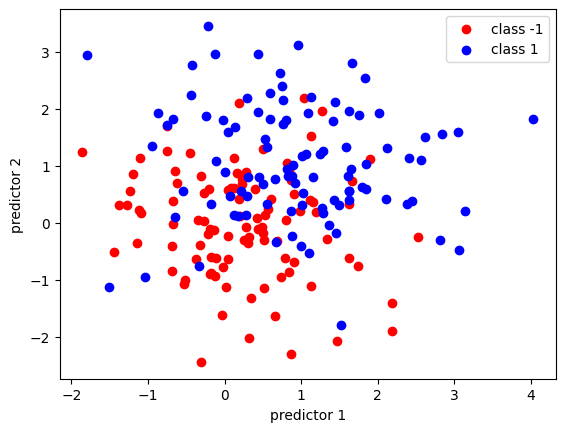

In [7]:
# generate data with 200 instead of 20 samples
np.random.seed(1)  # or any fixed seed you want
X = np.random.randn(200, 2)
y = np.array([-1]*100 + [1]*100)  # first 100 are -1, next 100 are +1
X[y == 1] += 1

y = np.array([-1]*100 + [1]*100)

plt.scatter(X[:100, 0], X[:100, 1], color='red', label='class -1')
plt.scatter(X[100:, 0], X[100:, 1], color='blue', label='class 1')

plt.xlabel('predictor 1')
plt.ylabel('predictor 2')
plt.legend()
plt.show()

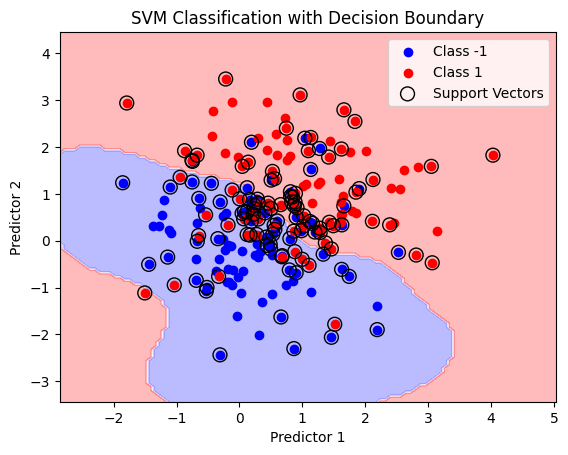

support vector indicies:  [  0   1   2   3   5   9  10  11  12  16  17  19  21  23  24  26  28  29
  30  32  33  35  36  38  39  41  44  45  47  48  50  51  59  61  62  63
  67  69  71  72  73  74  75  76  77  80  82  83  84  85  86  88  89  91
  93  95  96  97  98  99 102 103 105 106 112 113 114 116 117 118 119 120
 121 122 124 125 126 127 128 129 130 132 134 135 137 139 140 141 144 145
 146 147 148 149 150 151 153 155 156 157 159 160 161 162 166 168 169 171
 172 173 174 177 179 181 183 185 189 190 191 193 194 196 198 199]

total number of support vectors:  124
Number of errors: 41


In [8]:
# we can copy the whole code from the previous cell and run it again with "rbf" kernel and C=1

C = 1
gamma = 1
svm_model = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma))
svm_model.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:100, 0], X[:100, 1], color='blue', label='Class -1')
plt.scatter(X[100:, 0], X[100:, 1], color='red', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)
print("\ntotal number of support vectors: ", len(svm_model.named_steps['svc'].support_))

y_pred = svm_model.predict(X)
errors = (y_pred != y).sum()
print("Number of errors:", errors)

I should now increase the cost variable in order to reduce the number of training errors.

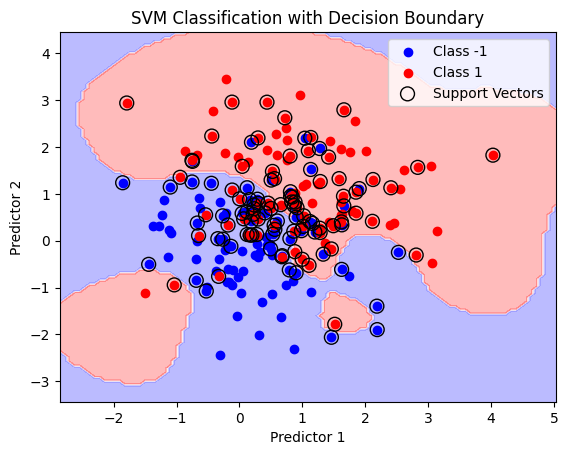

support vector indicies:  [  0   1   5   9  10  11  12  14  16  19  21  23  24  28  29  30  33  34
  35  36  39  41  42  43  44  45  48  50  51  54  59  61  62  63  67  69
  71  72  74  76  78  82  83  84  86  88  89  91  93  95  96  98  99 101
 102 103 104 105 106 109 113 114 116 117 118 120 121 124 125 126 130 132
 133 134 137 138 140 141 144 145 146 147 148 149 151 152 153 154 155 157
 158 159 160 161 163 166 168 171 173 174 176 177 179 181 183 184 185 186
 187 189 190 191 193 194 196]

total number of support vectors:  115
Number of errors: 37


In [9]:
# we can copy the whole code from the previous cell and run it again with "rbf" kernel and C=1

C = 100
gamma = 1
svm_model = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma))
svm_model.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:100, 0], X[:100, 1], color='blue', label='Class -1')
plt.scatter(X[100:, 0], X[100:, 1], color='red', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)
print("\ntotal number of support vectors: ", len(svm_model.named_steps['svc'].support_))

y_pred = svm_model.predict(X)
errors = (y_pred != y).sum()
print("Number of errors:", errors)

In [10]:
svm_pipeline = make_pipeline(SVC(kernel='rbf'))

param_grid = {'svc__C': [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}
param_grid['svc__gamma'] = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]


grid_search = GridSearchCV(
    svm_pipeline,
    param_grid=param_grid,
    scoring=('accuracy'),
    return_train_score=True,
    cv=10  # 10 folds
)

grid_search.fit(X, y)

# results of gridsearch (very long output)
#print(grid_search.cv_results_)

# Print the best C value and the best accuracy score
print("\n\nBest C:", grid_search.best_params_['svc__C'])
print("Best cross-validation accuracy:", grid_search.best_score_)

# Print the best gamma value
print("Best gamma:", grid_search.best_params_['svc__gamma'])

# Retrieve the best model
best_model = grid_search.best_estimator_
print("Support vectors of the best model:", best_model)

# print classes of the best model
print("Classes of the best model:", best_model.named_steps['svc'].classes_)
print("Number of support vectors for each class:", best_model.named_steps['svc'].n_support_)



Best C: 500
Best cross-validation accuracy: 0.785
Best gamma: 0.01
Support vectors of the best model: Pipeline(steps=[('svc', SVC(C=500, gamma=0.01))])
Classes of the best model: [-1  1]
Number of support vectors for each class: [55 56]


INTERPRETATION OF RESULTS

Now i can use the best model with C = 0.01 and Gamma = 0.01

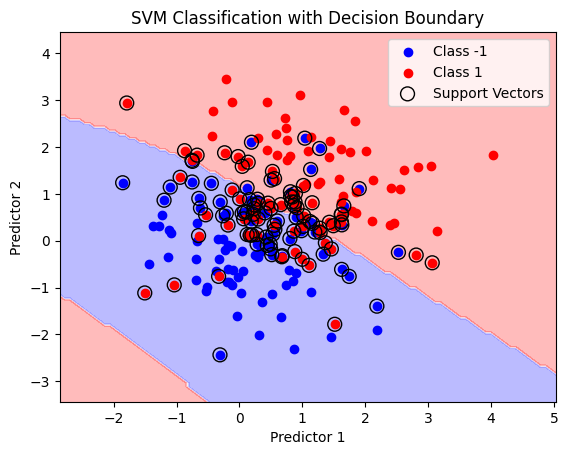

support vector indicies:  [  0   3   9  10  11  14  19  21  23  24  27  28  29  30  31  32  33  34
  36  38  39  41  42  44  45  47  49  50  51  59  61  62  63  64  69  71
  72  73  74  75  76  77  82  83  85  86  88  89  91  93  94  95  96  98
  99 102 103 105 107 108 113 114 117 118 119 120 121 122 123 124 125 126
 127 129 130 134 137 140 143 144 145 146 147 149 150 151 153 154 159 160
 161 166 168 169 171 172 173 174 177 178 179 181 183 185 189 191 193 194
 196 197 198]

total number of support vectors:  111
Number of errors: 46


In [11]:
# we can copy the whole code from the previous cell and run it again with "rbf" kernel and C=1

C = 500
gamma = 0.01
svm_model = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma))
svm_model.fit(X, y)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.bwr)  # Decision boundary
plt.scatter(X[:100, 0], X[:100, 1], color='blue', label='Class -1')
plt.scatter(X[100:, 0], X[100:, 1], color='red', label='Class 1')

# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

print("support vector indicies: ", svm_model.named_steps['svc'].support_)
print("\ntotal number of support vectors: ", len(svm_model.named_steps['svc'].support_))

y_pred = svm_model.predict(X)
errors = (y_pred != y).sum()
print("Number of errors:", errors)

In [12]:
# Generate list of 20 normally distributed random numbers (reused code)
np.random.seed(1)

X = np.random.randn(200, 2)
y = np.array([-1]*100 + [1]*100)  # first 100 are -1, next 100 are +1
X[y == 1] += 1

y = np.array([-1]*100 + [1]*100)




# create and fit model obtained through cross validation (reused code)
C = 500
gamma = 0.01
svm_model = make_pipeline(SVC(kernel='rbf', gamma=gamma, C=C))
svm_model.fit(X, y)

# Predict class labels
y_pred = svm_model.predict(X)

# Print the confusion matrix
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  -1   1
Actual           
-1         83  17
 1         29  71


INTERPRETATION OF RESULTS

### Learn and assess an SVM classifier for multiple classes                                              

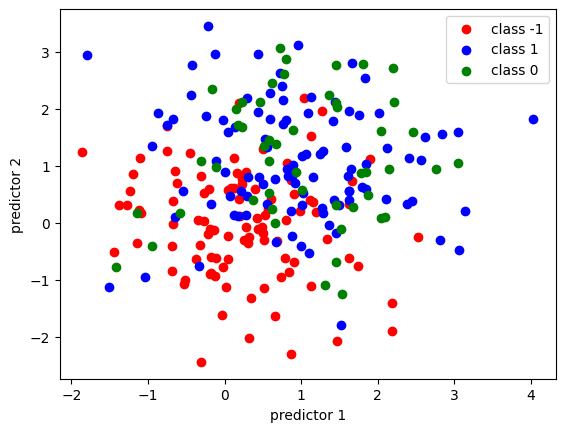

In [13]:
# generate data with 200 instead of 20 samples
np.random.seed(1)  # or any fixed seed you want
X = np.random.randn(200, 2)
y = np.array([-1]*100 + [1]*100)  # first 100 are -1, next 100 are +1
X[y == 1] += 1
y = np.array([-1]*100 + [1]*100)

X_new = np.random.randn(50, 2)
X_new += 1

y_new = np.array([0]*50)

X_extended = np.vstack([X, X_new])
y_extended = np.concatenate([y, y_new])

plt.scatter(X_extended[y_extended == -1, 0], X_extended[y_extended == -1, 1], color='red', label='class -1')
plt.scatter(X_extended[y_extended == 1, 0], X_extended[y_extended == 1, 1], color='blue', label='class 1')
plt.scatter(X_extended[y_extended == 0, 0], X_extended[y_extended == 0, 1], color='green', label='class 0')

# print amount of samples in each class
#print("Amount of samples in each class:", np.bincount(y_extended + 1))

plt.xlabel('predictor 1')
plt.ylabel('predictor 2')
plt.legend()
plt.show()

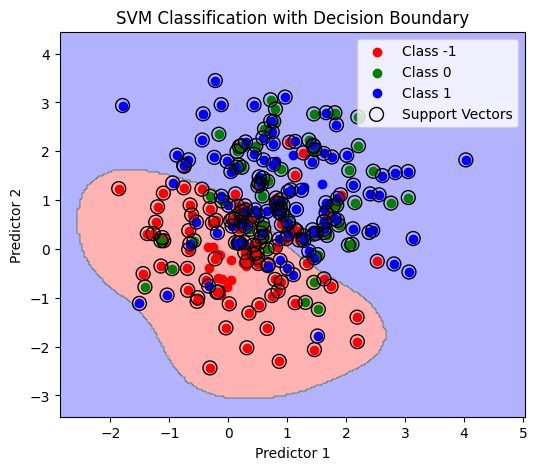


total number of support vectors:  232
Number of errors: 93


In [14]:
# we can copy the whole code from the previous cell and run it again with "rbf" kernel and C=1

C = 0.1
gamma = 1
svm_model = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma))
svm_model.fit(X_extended, y_extended)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_extended[:, 0].min() - 1, X_extended[:, 0].max() + 1
y_min, y_max = X_extended[:, 1].min() - 1, X_extended[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)







unique_labels = np.unique(y_extended)   # e.g. array([-1,  0,  1])
label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
Z_idx = np.vectorize(label_to_idx.get)(Z)  # convert each label to 0,1,2

# ----- 5) Define a colormap for 3 classes (red, green, blue for example) ----- #
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(6, 5))
# Plot the 3-class decision regions
plt.contourf(xx, yy, Z_idx, alpha=0.3, cmap=cmap, levels=[-0.5, 0.5, 1.5, 2.5])

# ----- 6) Plot the training points by their true class ----- #
# We'll use the same color scheme: class -1=red, 0=green, 1=blue
for lab, color in zip(unique_labels, ['red', 'green', 'blue']):
    plt.scatter(X_extended[y_extended == lab, 0],
                X_extended[y_extended == lab, 1],
                color=color,
                label=f'Class {lab}')






# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

#print("support vector indicies: ", svm_model.named_steps['svc'].support_)
print("\ntotal number of support vectors: ", len(svm_model.named_steps['svc'].support_))

y_pred = svm_model.predict(X_extended)
errors = (y_pred != y_extended).sum()
print("Number of errors:", errors)

In [15]:
svm_pipeline = make_pipeline(SVC(kernel='rbf'))

def error_rate(y_true, y_pred):
    return (y_true != y_pred).mean()  # fraction of misclassified samples

# We'll multiply by -1, so that maximizing this is the same as minimizing the error
def negative_error_rate(y_true, y_pred):
    return -1 * error_rate(y_true, y_pred)

neg_error_scorer = make_scorer(negative_error_rate, greater_is_better=True)

param_grid = {'svc__C': [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}
param_grid['svc__gamma'] = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]


grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    scoring=neg_error_scorer,
    return_train_score=True,
    cv=10  # 10 folds
)

grid_search.fit(X, y)

# results of gridsearch (very long output)
#print(grid_search.cv_results_)

print("Best parameters (min error):", grid_search.best_params_)
print("Best cross-validation negative error:", grid_search.best_score_)

best_error = -grid_search.best_score_
print("Corresponding error rate:", best_error)

Best parameters (min error): {'svc__C': 500, 'svc__gamma': 0.01}
Best cross-validation negative error: -0.215
Corresponding error rate: 0.215


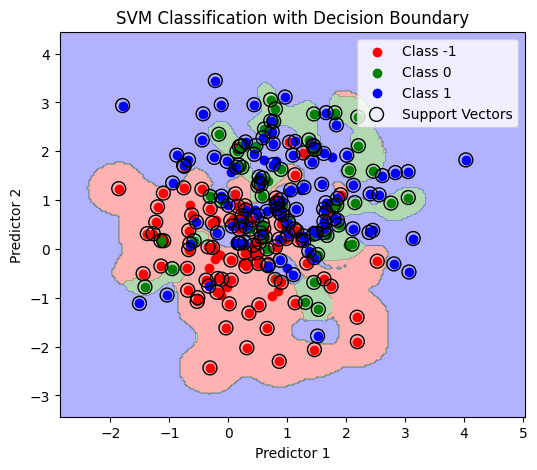


total number of support vectors:  217
Number of errors: 36


In [16]:
# we can copy the whole code from the previous cell and run it again with "rbf" kernel and C=1

C = 10
gamma = 10
svm_model = make_pipeline(SVC(kernel='rbf', C=C, gamma=gamma))
svm_model.fit(X_extended, y_extended)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_extended[:, 0].min() - 1, X_extended[:, 0].max() + 1
y_min, y_max = X_extended[:, 1].min() - 1, X_extended[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Predict class labels for the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)







unique_labels = np.unique(y_extended)   # e.g. array([-1,  0,  1])
label_to_idx = {lab: i for i, lab in enumerate(unique_labels)}
Z_idx = np.vectorize(label_to_idx.get)(Z)  # convert each label to 0,1,2

# ----- 5) Define a colormap for 3 classes (red, green, blue for example) ----- #
cmap = ListedColormap(['red', 'green', 'blue'])

plt.figure(figsize=(6, 5))
# Plot the 3-class decision regions
plt.contourf(xx, yy, Z_idx, alpha=0.3, cmap=cmap, levels=[-0.5, 0.5, 1.5, 2.5])

# ----- 6) Plot the training points by their true class ----- #
# We'll use the same color scheme: class -1=red, 0=green, 1=blue
for lab, color in zip(unique_labels, ['red', 'green', 'blue']):
    plt.scatter(X_extended[y_extended == lab, 0],
                X_extended[y_extended == lab, 1],
                color=color,
                label=f'Class {lab}')






# Plot support vectors
sv = svm_model.named_steps['svc'].support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', label="Support Vectors")

plt.xlabel('Predictor 1')
plt.ylabel('Predictor 2')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()

#print("support vector indicies: ", svm_model.named_steps['svc'].support_)
print("\ntotal number of support vectors: ", len(svm_model.named_steps['svc'].support_))

y_pred = svm_model.predict(X_extended)
errors = (y_pred != y_extended).sum()
print("Number of errors:", errors)

In [17]:
# TODO: FIX THIS


np.random.seed(1)  # or any fixed seed you want
X = np.random.randn(200, 2)
y = np.array([-1]*100 + [1]*100)  # first 100 are -1, next 100 are +1
X[y == 1] += 1
y = np.array([-1]*100 + [1]*100)

X_new = np.random.randn(50, 2)
X_new += 1

y_new = np.array([0]*50)

X_extended = np.vstack([X, X_new])
y_extended = np.concatenate([y, y_new])



# create and fit model obtained through cross validation (reused code)
C = 10
gamma = 10
svm_model = make_pipeline(SVC(kernel='rbf', gamma=gamma, C=C))
svm_model.fit(X_extended, y_extended)

# Predict class labels
y_pred = svm_model.predict(X)

# Print the confusion matrix
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  -1   0   1
Actual               
-1         86   2  12
 1          7   6  87


### Apply SVM to gene expression data

In [22]:
# load carseats.csv
khan_xtest = pd.read_csv('Khan_xtest.csv')
khan_ytest = pd.read_csv('Khan_ytest.csv')

khan_xtrain = pd.read_csv('Khan_xtrain.csv')
khan_ytrain = pd.read_csv('Khan_ytrain.csv')

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

print(khan_xtest.describe(), end="\n\n")
print(khan_ytest.describe(), end="\n\n")
print(khan_xtrain.describe(), end="\n\n")
print(khan_ytrain.describe(), end="\n\n")

print("total amount of datapoints: ")
print(khan_xtest.shape[0] + khan_ytest.shape[0] + khan_xtrain.shape[0] + khan_ytrain.shape[0])

              V1         V2         V3         V4         V5         V6  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean   -0.066476  -1.419192  -0.062079  -2.246594  -1.348305  -0.152565   
std     1.057027   0.776292   0.714713   0.482669   0.288687   0.917996   
min    -2.136224  -2.439551  -1.538048  -3.366796  -1.822631  -1.263723   
25%    -0.408574  -1.991004  -0.488260  -2.618142  -1.541347  -1.037483   
50%    -0.191585  -1.449957   0.108663  -2.156792  -1.317902  -0.396405   
75%     0.724072  -1.109865   0.365710  -1.896795  -1.189614   0.684111   
max     1.471485   0.495367   1.103533  -1.465771  -0.659132   1.506186   

              V7         V8         V9        V10        V11        V12  \
count  20.000000  20.000000  20.000000  20.000000  20.000000  20.000000   
mean    2.087737   0.270415   0.493585   0.544348   2.096739  -0.342339   
std     0.430019   0.513749   0.421549   0.452692   0.455253   0.565958   
min     1.426380  -0.743